# Introduction to Data Analysis
I don't really have any formal training in data analysis/machine learning, so whatever I put here is based off what experience I have. There may be some bad practices or inefficient ways of doing things, but this is to give a rough idea of what working with data outside of excel is like.

## Obtaining data
The first step in any data analysis pipeline is the question of how to get the data. This may seem like a weird issue but unless you are really lucky to be working very downstream in a group, learning about how to obtain data is quite important and domain specific. Below are a few ways I can think of:

1. Downloading from known repositories e.g [Gene Expression Omnibus/NCBI](https://www.ncbi.nlm.nih.gov/geo/), [Machine Learning Repositories](https://archive.ics.uci.edu/ml/index.php), [Online competitions like kaggle](https://www.kaggle.com/), etc.
2. Perform your own experiment and collect data
3. Trawl some source for data e.g text-mining/image-scraping

In these handouts we will mainly be using the first method because it is much simpler to do so. Obtaining data can also be more complex if using methods 2 and 3, because most of the time, the data collected will not be in the most useful form, and must be pre-processed.

## Pre-processing and Cleaning Data
The next step after obtaining data is to pre-process and clean it. This step is quite variable and dependent on the domain you are working in. For instance, in next-generation sequencing project, the sequencing machine will spit out data in the form of raw reads, literally strings of ACTG and how many of them there are and what quality each base was called etc. This isn't the most readily usable data, and there is a complex pipeline of programs which pre-process the data first by aligning it to a reference genome, producing raw counts, inferring expression from counts etc. Having a good understanding of where your data comes from and how it is processed is crucial for reproducibility as well as understanding where biases might creep into your data. The other aspect, cleaning your data, comprises several steps such as ensuring the data you have is of good quality and
identifying missing values in your data and deciding what to do with it (discard samples with missing values? Impute aka guess the values?).

## Exploratory Analysis
Once you have obtained, pre-processed and cleaned the data. The next step is to get a *feel* for the data. This means having an idea of the size of the dataset, the distribution of each of the features, the types of data present etc. In general data can be divided into 3 main types **categorical, real, boolean**. Real and boolean should be familiar to you as they just refer to numeric and boolean data types respectively. **Categorical** refers to data which can only take from a limited **set** of values e.g labels. For anyone familiar with R, these are factors.

## Hands-on section
The most common way to represent data should be familiar to everyone who has used excel, and that is to use a dataframe. A **datafame** is a matrix where each **row represents a sample** while a **column represents a feature.** A **sample** usually refers to a particular instance drawn from a distribution, for instance a single tissue biopsy taken from a tumour. A **feature** refers to a measure of some property of the samples and a huge part of data analysis and machine learning is about how to identify what is a useful feature. Traditionally, feature selection requires input from domain experts intuition, people who know how phenomenon in the real world affects the data being collected. This is an important and time consuming step as all downstream analysis will depend on the features selected. This is one reason why deep learning has proven to be so revolutionary, because it enables the creation/extraction of features from data with minimal domain expertise and probably does it better than domain experts.

To put into practice the process of obtaining, pre-processing, and cleaning data, we will use the **Iris** dataset, an iconic toy data set for practice. Every data set that is created and published **should** have the data as well as a qualitative description of the data e.g what the features and samples are. Take a look at the description for the Iris data set [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names). This is a dataset for the **classification** of flowers based on sepal and petal characteristics. As an aside, in data analysis and machine learning the goal is usually one of a few **tasks** such as **classification** or **regression**.

In python, the staple libraries for data analysis are **numpy**, **pandas**, **scipy**, **sci-kitlearn**, **matplotlib**. Libraries are code written by others so we don't have to and we should be very grateful to them for making our lives easier. However, in some cases we will be writing our own code to better understand the process of data analysis. You can use code by importing libraries like so.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The use of **import x as y** is to create a **namespace** which is basically just a way to refer to code that might clash e.g functions with the same name but in different libraries. The **x.y** syntax is the use of object oriented programming where you can think of it as y belongs to x. Now we will read in the data set using the **read_csv** function from pandas which returns a **dataframe object**.

In [ ]:
iris = pd.read_csv("iris.csv",names=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Class"]) # using the namespace pd

Now that we have loaded the data set into memory, we want to **explore** it. First we would like to find out the scale of the data, how many samples and features does it have. To do this, we can use the **shape** property of a pandas dataframe. Access this property using the **x.y** syntax where a **property y belongs to an object x**.

In [ ]:
# Find out the shape of the data here
iris.shape

Another useful thing to find out would be that is the data set clean, e.g are there missing values or invalid values. To do this, we can call the **isna** function on the dataframe object. Access this function using the **x.y()** syntax where a **function y belongs to an object x**.

In [ ]:
# Find out if there are any NA values
iris.isna()

The **isna** function returns a boolean value for each element in the dataframe being called. However, this makes it difficult to see, even with such a small data set. Boolean values are ultimately 1 or 0, so you can actually count them by using a function **np.sum** which just sums any dataframe passed into it. Pass in the output of the **isna** function to the **np.sum** function.

In [ ]:
# Get a summary of NA values in the dataframe
np.sum(iris.isna())

Now that we do know there is NA value in here, we would like to discard this sample. To do this, we need to know how to access rows or columns or individual values in the dataframe. We can do so through several ways such as the **mydataframe.iloc[rows, columns]** property where rows and columns are each a list of integers. We can also access columns via the column names like so **mydataframe["column_name"]**, and we can also use **boolean indexing** which is a versatile way to access elements of a dataframe by passing in a **list of boolean values** such as **mydataframe[boolean_list]**. Now using this information and the **isna** function previously, can you first **generate a list of boolean values** corresponding to each row in the dataframe based on whether there is a NA value in the Petal_Length feature or not. Then use this set of boolean values to find out which row has the offending NA value.

In [ ]:
# Generate boolean values for each row based on whether there is a NA value or not
boolean_vals = iris["Petal_Length"].isna()
# Find out which row has the offending NA value
iris[boolean_vals]

However, we would like to instead find all the values rows which do not have any NA values in them. To do this we can use the **~ operator** , which basically negates all the boolean values if you apply it like so **mydataframe[~boolean_values]**

In [ ]:
# Get all rows without NA values
iris[~boolean_vals]

However, as with many things, libraries actually make life easier for you and you can actually just use the **mydataframe.dropna()** to remove rows with NAs. If you want to remove columns with NAs just pass **mydataframe.dropna(axis=1)**. This function returns a new dataframe object with the dropped rows/columns, so remember to assign it to a new variable or back to the old variable!

In [ ]:
iris = iris.dropna()

Now that we have cleaned up all the NA values, we would also like to check for any invalid values, for instance, we shouldn't be getting any negative values. Using boolean expressions with the dataframe, can you identify if there are any invalid values?

In [ ]:
# Identify invalid values here
np.sum(iris < 0)

Now remove that row using boolean indexing and remember to reassign the new dataframe to the original variable.

In [ ]:
# Remove the row with the invalid value
iris = iris[iris["Sepal_Width"] > 0]

Now that we have cleaned the data, we would like to have a feel of the data like finding out the mean and standard deviation of each feature. Using the functions **np.mean** and **np.std** for mean and standard deviation calculations respectively, calculate the mean and standard deviation for each column by passing in the column to the function

In [ ]:
# Calculate the mean and standard deviation for each column
print("Speal Length Mean: " + str(np.mean(iris["Sepal_Length"])))
print("Sepal Length Sdev: " + str(np.std(iris["Sepal_Length"])))
print("Sepal Width Mean: " + str(np.mean(iris["Sepal_Width"])))
print("Sepal Width Sdev: " + str(np.std(iris["Sepal_Width"])))
print("Petal Length Mean: " + str(np.mean(iris["Petal_Length"])))
print("Petal Length Sdev: " + str(np.std(iris["Petal_Length"])))
print("Petal Width Mean: " + str(np.mean(iris["Petal_Width"])))
print("Petal Width Sdev: " + str(np.std(iris["Petal_Width"])))

As is usually the case, there is a simpler way to go about getting a feel for the data by using the **dataframe.describe()** function.

In [ ]:
# Use the describe function to get an overview of the data
iris.describe()

Another way of summarising data is to create a **histogram**. In case anyone doesn't know what a histogram is, it is a plot of frequency against bins, where bins is some range where all values within that range are dumped into it as counts, so in a way discretising the data. Using the **plt.hist()** function, pass in the Sepal_Width column to the histogram function and plot a histogram. You can also use the **plt.xlabel(some_text)**, **plt.ylabel(some_text)** and **plt.title(some_text)** to label the histogram plot.

Text(0.5,1,'Histogram of Sepal Widths of Iris data set')

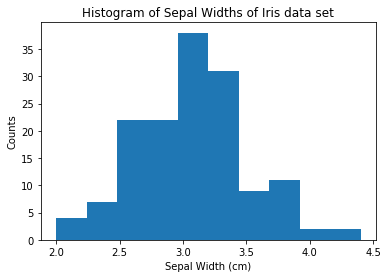

In [20]:
# Plot the Sepal Width data here
plt.hist(iris["Sepal_Width"])
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Counts")
plt.title("Histogram of Sepal Widths of Iris data set")

## Summary
In this handout we have learned the initial steps of any data analysis/machine learning pipeline. Although they sound tedious or trivial, the bulk of data science work (some quote 70%) lies in these steps. To remind you this is what we have learned:
1. How to obtain data, and what sources are available
2. What pre-processing is and why we need domain expertise
3. How to clean and verify data quality
4. What a dataframe is and the importance of understanding **samples** and **features**
5. How to explore the data and get a feel of it before embarking on more complex analyses

## Exercises
The data contains 3 different classes of flowers in the **Class** column. 
1. Iris-setosa
2. Iris-versicolor
3. Iris-virginica
Split the iris dataframe into 3 dataframes, 1 for each class

In [21]:
# Split the iris dataframe into 3 based on class here
setosa = iris[iris["Class"] == "Iris-setosa"]
versicolor = iris[iris["Class"] == "Iris-versicolor"]
virginica = iris[iris["Class"] == "Iris-virginica"]

Now calculate the mean and standard deviation for each of these 3 classes and each feature. Are they significantly different?

In [22]:
# Calculate mean and standard deviation for each class

Using the T-test from the **scipy** package, can you say determine which features are likely the most significantly different between the classes?

In [ ]:
from scipy.stats import ttest_ind # import the t test function from scipy.
